<font size=6>titanic prediction(基于决策树的模型学习与预测）fin_tech课程展示</font>


## 小组成员：<font color=purple>蔡咏灿</font>——<font color=red>陈子颜</font>——<font color=orange>李林希</font>——<font color=blue>李沛颖</font>——<font color=grey>熊金瑞</font>——<font color=pink>徐开月</font>——<font color=#008000>位晓峰</font>  
（按照首字母排序）


![00006-750209591-titanic%20_%28movie_%29,%20masterpiece,%20lady,%20gentleman,high%20quality,%20poster%20_(object_),.png](attachment:00006-750209591-titanic%20_%28movie_%29,%20masterpiece,%20lady,%20gentleman,high%20quality,%20poster%20_(object_),.png)
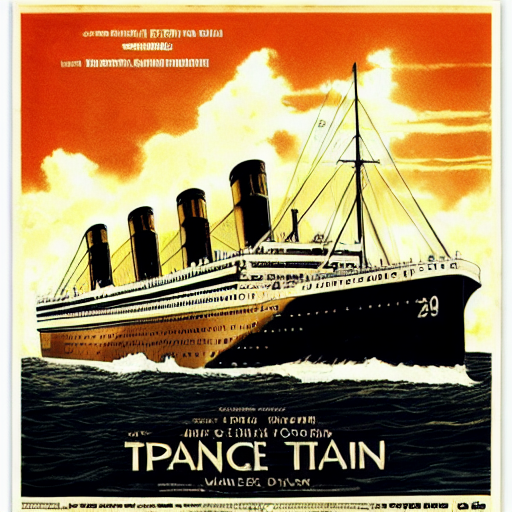

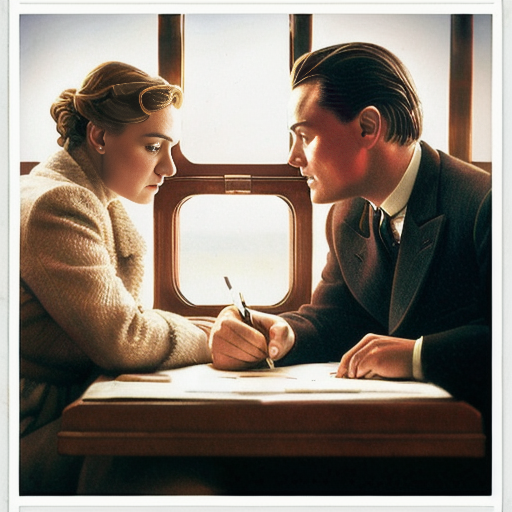

## 背景介绍
>泰坦尼克号（RMS Titanic），是英国白星航运公司下辖的一艘奥林匹克级游轮，排水量46000吨，是当时世界上体积最庞大、内部设施最豪华的客运轮船，有“永不沉没”的美誉 。在它的处女航行中，泰坦尼克号与一座冰山相撞，造成右舷船艏至船中部破裂，五间水密舱进水。1912年4月15日凌晨2时20分左右，泰坦尼克船体断裂成两截后沉入大西洋底3700米处。2224名船员及乘客中，1517人丧生，其中仅333具罹难者遗体被寻回。泰坦尼克号沉没事故为和平时期死伤人数最为惨重的一次海难，其残骸直至1985年才被再度发现，目前受到联合国教育、科学及文化组织的保护。

>在英剧《Downton Abbey》中，Robert伯爵在听到Titanic沉没的消息时候说：“Every mountain is unclimbable until someone clime it, so every ship is unsinkable until it sinks.”(没有高不可攀的高峰，也没有永不翻沉的船)

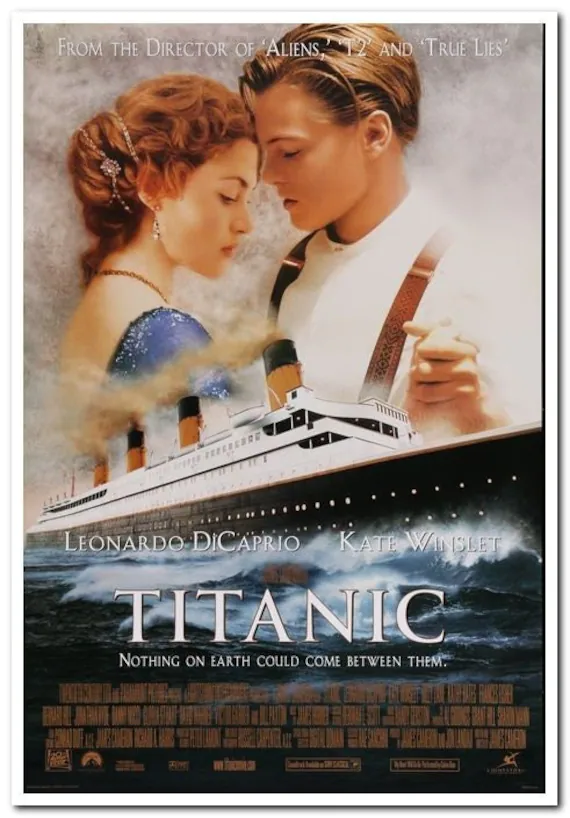

## 目的：掌握sklearn中决策树模型的使用
## 内容目录：
### *1、调用scikit-learn中的决策树模型，使用kaggle中泰坦尼克号的逃生的逃生数据，深入了解决策树模型的底层逻辑。（完整数据集见附件）*
### *2、自行构建决策树算法，并根据泰坦尼克号数据集完成训练，评估和预测。*
### *3、比较库中模型和自建模型预测结果的准确率，并分析原因。*


<font face="黑体" color=orange size=5>前期准备工作：pandas、numpy、matplotlib、sklearn</font>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

<font face="黑体" color=blue size=5>导入数据，读取文件，指定第一列为行索引</font>

In [46]:
filename=r"C:\Users\qbhs0725\fin_tech\train.csv"
data=pd.read_csv(filename,index_col=0)
filename2=r"C:\Users\qbhs0725\fin_tech\test.csv"
data2=pd.read_csv(filename2,index_col=0)
filename3=r"C:\Users\qbhs0725\fin_tech\gender_submission.csv"
data3=pd.read_csv(filename3,index_col=0)

### 数据处理

In [47]:
print(data[:20])
def clear_data(data):
    # 数据清洗过程
    # 去掉指定列
    data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    # 处理性别数据
    data['Sex'] = (data['Sex'] == 'male').astype('int')
    #将性别为男标记为1，女标记为0
    # 处理港口数据，S为0，C为1，Q为2
    labels = data['Embarked'].unique().tolist()
    data['Embarked'] = data['Embarked'].apply(lambda n: labels.index(n))
    # 处理缺失值
    data = data.fillna(0)
    return data
# print(data['Sex'])
# print(data['Embarked'])

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   
11                  1       3   
12                  1       1   
13                  0       3   
14                  0       3   
15                  0       3   
16                  1       2   
17                  0       3   
18                  1       2   
19                  0       3   
20                  1       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John B

<font color=Blue size=4>这段代码定义了两个函数，get_score(d)和cv_score(val)。  
    get_score(d)函数将数据集分成训练集和测试集，使用决策树分类器拟合训练数据，并返回训练和测试的得分（精度）。其中max_depth是一个可选参数，用于控制决策树模型的最大深度。  
    cv_score(val)函数用于交叉验证（cross-validation）评估模型性能。它也使用决策树分类器拟合训练数据，但这里的参数min_impurity_decrease是控制节点分裂的阈值。函数返回训练和验证的得分。  
X_train, Y_train, X_test, Y_test是事先定义好的训练集和测试集数据。</font>

In [48]:
def get_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, Y_train)
    tr_score = clf.score(X_train, Y_train)
    te_score = clf.score(X_test, Y_test)
    return (tr_score, te_score )

def cv_score(val):
    clf = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=val)
    clf.fit(X_train, Y_train)
    tr_score = clf.score(X_train, Y_train)
    cv_score = clf.score(X_test, Y_test)
    return (tr_score, cv_score)
#min_impurity_decrease：如果分裂指标的减少量大于该值，则进行分裂。

# 将数据集进行分类，分为训练集和测试集
 <table><tr><td bgcolor=yellow>将data和data2数据进行清理（clear_data）以去除无效的信息，然后分别将它们作为训练集X_train和测试集X_test。同时，定义Y_train和Y_test为训练集和测试集的目标值。</td></tr></table> 
 <font color=blue size=4>将data和data2数据进行清理（clear_data）以去除无效的信息，然后分别将它们作为训练集X_train和测试集X_test。同时，定义Y_train和Y_test为训练集和测试集的目标值。 </font>

In [49]:
data=clear_data(data)
data2=clear_data(data2)
X_train = data.drop(['Survived'], axis=1).values
Y_train= data['Survived'].values
X_test= data2.values
Y_test= data3['Survived'].values
data.info() # 查看train.csv的总体
data2.info() # 查看test.csv的总体

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 59.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-nul

<font face="黑体" color=green size=5>采用默认参数建立一个决策树分类器clf，并使用fit方法在训练集上训练模型。  
使用score方法计算模型在训练集和测试集上的得分并分别赋值给train_score和test_score。  
目的是利用决策树分类器对训练集进行训练，并在测试集上验证模型性能。  
输出的结果train score和test score分别表示模型在训练集和测试集上的精度得分。</font>

In [50]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
train_score = clf.score(X_train, Y_train)
test_score = clf.score(X_test, Y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 0.9820426487093153; test score: 0.6339712918660287


In [51]:
# DecisionTreeClassifier(max_depth=3, min_impurity_decrease=0.004285714285714286, criterion='Pclass')
# clf.fit(X_train, Y_train)
# train_score = clf.score(X_train, Y_train)
# test_score = clf.score(X_test, Y_test)
# print('train score: {0}; test score: {1}'.format(train_score, test_score))

<font size=5>在决策树算法中,深度剪枝(deep pruning)与阈值剪枝(Threshold pruning)是两种不同的剪枝方法:  </font>
1. 深度剪枝:在构建决策树的过程中,限制树的最大深度,不继续向下生长。这可以防止树过于生长,导致过拟合问题。限制树的深度可以得到一棵相对简单的决策树。
2. 阈值剪枝:先允许决策树深度生长,构建出完整的树,然后从树的叶节点开始反向剪枝,剪去那些不符合提高树性能的节点与分支。这需要设置一个阈值(threshold),当剪枝可以提高准确率时就执行剪枝。


<font size=3 color=purple>简而言之:深度剪枝是在构建树的过程中进行控制,它限制树的最大深度,可以得到一棵简单的树,防止过拟合。  
阈值剪枝是在构建完全树之后进行剪枝,它从叶子节点开始剪枝,只有当剪枝可以提高性能时才剪枝,可以得到更加复杂精确的树。  
深度剪枝比较简单,但可能导致高偏差;阈值剪枝虽然可以得到更优的树,但比较复杂,需要选择合适的阈值。  
所以,总体而言,深度剪枝更简单,阈值剪枝更复杂但性能更优。根据具体问题可以选择不同的剪枝方法以取得良好的权衡。  </font>


<font face="微软雅黑" color=green size=5>这段代码用于在给定的决策树最大深度取值范围内，寻找最佳模型参数和对应的得分。 </font> 
1. 定义了一个整数序列depths作为决策树的最大深度可选取值。然后，使用列表推导式和get_score(d)函数计算不同深度下训练集和测试集的精度得分，并将结果存储在scores列表中。同时，tr_scores列表和te_scores列表分别存储训练集和测试集精度得分。  
2. 利用numpy.argmax()函数找到测试集得分（te_scores）中最大值所在的位置，即最佳得分的索引best_score_index。再通过该索引找到对应的最佳深度值，即best_param。    
3. 输出最佳深度值和相应的最佳测试集精度得分。这段代码的目的是通过比较不同深度下的模型性能，选择测试集上精度得分最高的模型参数作为最佳参数，以便优化模型性能。 

In [52]:
depths = range(2, 15)
scores = [get_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
te_scores = [s[1] for s in scores]

best_score_index = np.argmax(te_scores)
best_score = te_scores[best_score_index]
best_param = depths[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))

best param: 3; best score: 0.9856459330143541


## 利用matplotlib库画出不同深度下模型的训练集和测试集得分，并输出选择最佳参数后，模型在训练集和测试集上的得分。

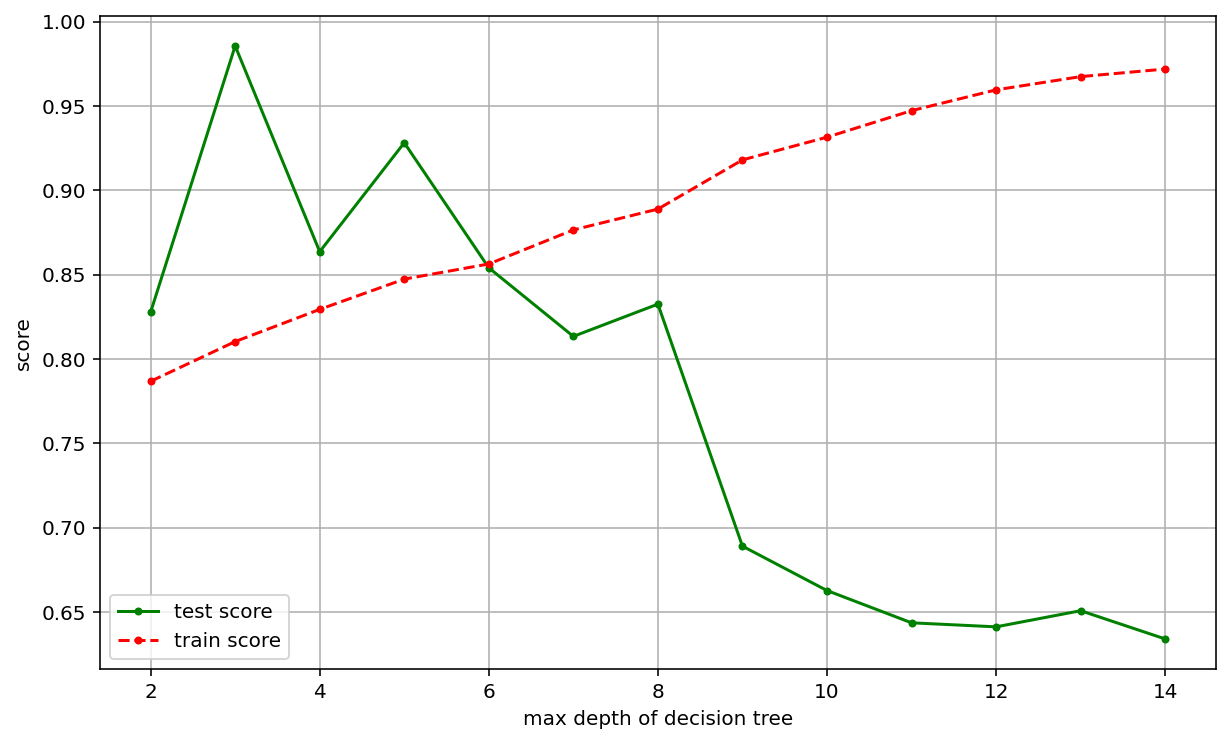

In [53]:
# 设置画布大小和分辨率
plt.figure(figsize=(10, 6), dpi=144)
# 绘制图像
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, te_scores, '.g-', label='test score')
plt.plot(depths, tr_scores, '.r--', label='train score')
plt.legend()
plt.show()

In [54]:
# 构建最佳参数的决策树分类器并重新训练模型
clf = DecisionTreeClassifier(max_depth=best_param)
clf.fit(X_train, Y_train)
# 计算模型在训练集和测试集上的精度得分
train_score = clf.score(X_train, Y_train)
test_score = clf.score(X_test, Y_test)
# 输出结果
print('depth change:train score: {0}; test score: {1}'.format(train_score, test_score))

depth change:train score: 0.8103254769921436; test score: 0.9856459330143541


## 阈值剪枝
这段代码与之前的代码相比，只是对决策树模型进行了阈值剪枝，即通过调整指定条件下节点分裂的最小不纯度值来达到剪枝的效果。具体实现步骤如下：  

1. 使用numpy库中的linspace()函数在0到0.005的范围内生成50个等间距的阈值，并使用cv_score()函数计算每个阈值下的训练集和验证集得分，并将结果存储在scores列表中。然后，将训练集得分和验证集得分分别存储在tr_scores和te_scores列表中。  

2. 利用numpy.argmax()函数找到验证集得分（te_scores）中最大值所在的位置，即最佳得分的索引best_score_index。然后，根据该索引找到对应的最佳参数值best_param和最佳测试集得分best_score。  

3. 使用matplotlib库绘制阈值和得分的关系图，并使用最佳参数重新构建一个决策树分类器clf，并使用fit()方法在训练集上进行拟合。然后，再次计算模型在训练集和测试集上的得分train_score和test_score，并输出结果。这样可以验证选择最佳参数后，模型性能是否得到了进一步的提高。  


In [55]:
# 指定参数范围，分别训练模型，并计算评分
values = np.linspace(0, 0.005, 50)  # 在指定范围内生成50个等间距的阈值
scores = [cv_score(v) for v in values]  # 计算每个阈值下的训练集和验证集得分
tr_scores = [s[0] for s in scores]  # 存储训练集得分
te_scores = [s[1] for s in scores]  # 存储验证集得分

In [56]:
# 找出评分最高的模型参数
best_score_index = np.argmax(te_scores)  # 获取验证集得分最高对应的阈值索引
best_score = te_scores[best_score_index]  # 获取验证集得分最高值
best_param = values[best_score_index]  # 获取验证集得分最高对应的阈值
print('best param: {0}; best score: {1}'.format(best_param, best_score))

best param: 0.004489795918367347; best score: 0.8588516746411483


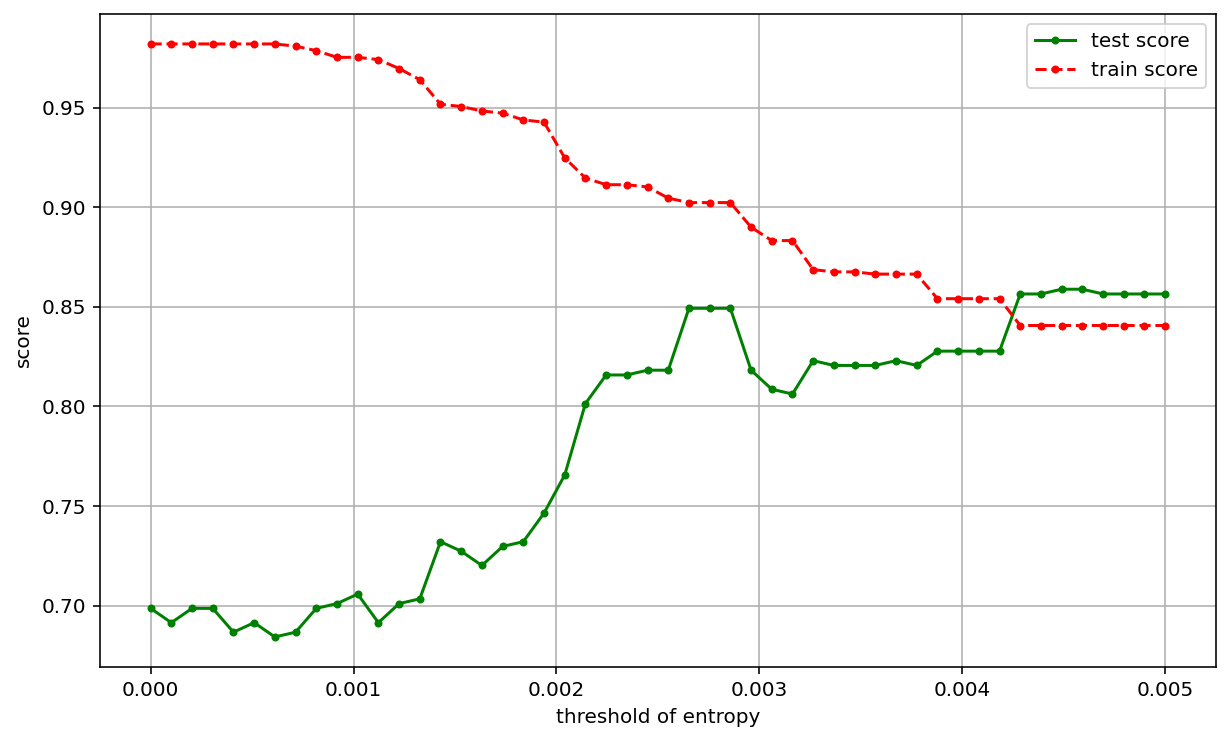

In [57]:
# 绘制阈值与得分的关系图
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.plot(values, te_scores, '.g-', label='test score')
plt.plot(values, tr_scores, '.r--', label='train score')
plt.legend()
plt.show()

In [58]:
# 使用最佳模型参数重新训练模型并计算得分
clf = DecisionTreeClassifier(min_impurity_decrease=best_param)
clf.fit(X_train, Y_train)
train_score = clf.score(X_train, Y_train)
test_score = clf.score(X_test, Y_test)
print('threshold value change:train score: {0}; test score: {1}'.format(train_score, test_score))

threshold value change:train score: 0.8226711560044894; test score: 0.9569377990430622


# 通过信息熵自建决策树模型
以下代码主要包括了数据清洗、连续性数值分档和信息熵计算等模块。  

首先，使用pandas库中的read_csv()函数读取train.csv、test.csv和gender_submission.csv三个文件，并将第一列设置为行索引。然后，依次定义了数据清洗函数clear_data()、连续性数值分档函数divide_class()和计算信息熵函数Cal_Comentropy()。  

clear_data()函数的作用是对原始数据进行清洗处理，包括去掉无用列（"Name"、"Ticket"和"Cabin"），将"Sex"列中的文本转化为0/1标签，将"Embarked"列中的不同值转化为整数标签，并将空缺处填充为0。  

divide_class()函数的作用是对连续型数值进行分档处理，将某一列中的数值分成两类，小于等于中位数的被分到0类，大于中位数的被分到1类。
Cal_Comentropy()函数的作用是计算输入变量x的信息熵，并返回计算结果。其中，x是一个列表或一维数组。首先使用一个for循环，遍历列表x中的每个元素，记录所有不同元素出现的次数。然后，根据每种元素出现的次数计算出相应的概率，并将各自的概率值累加起来得到信息熵H。最后将计算所得的信息熵以负数形式返回。

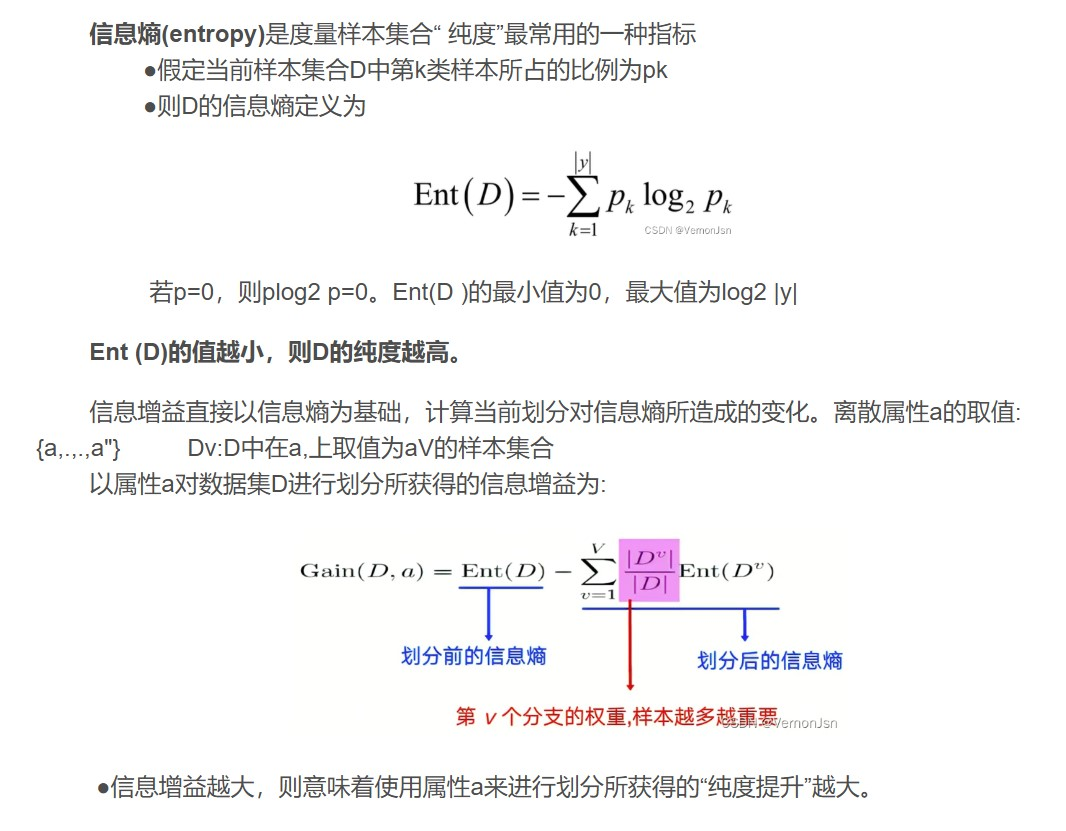

In [59]:
# 导入库
import pandas as pd
import math
import numpy as np

In [60]:
# 调整numpy库输出数组时的精度和阈值
np.set_printoptions(threshold=np.inf)
#读取文件，指定第一列作为行索引
filename=r"C:\Users\qbhs0725\fin_tech\train.csv"
data=pd.read_csv(filename,index_col=0)
filename2=r"C:\Users\qbhs0725\fin_tech\test.csv"
data2=pd.read_csv(filename2,index_col=0)
filename3=r"C:\Users\qbhs0725\fin_tech\gender_submission.csv"
data3=pd.read_csv(filename3,index_col=0)

In [61]:
def clear_data(data):
    # 数据清洗过程
    # 去掉指定列
    data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    # 处理性别数据
    data['Sex'] = (data['Sex'] == 'male').astype('int')
    # 处理港口数据
    labels = data['Embarked'].unique().tolist()
    data['Embarked'] = data['Embarked'].apply(lambda n: labels.index(n))
    # 处理缺失值
    data = data.fillna(0)
    return data

In [62]:
# 对连续性数值进行分档
def divide_class(data,name):#对某些数据进行分档
    mx=max(data[name])
    mi=min(data[name])
    mid=(mx+mi)/2
    data[name] = data[name].map(lambda x: 0 if x <=mid else 1 )
    return data

In [63]:
# 计算信息熵
def Cal_Comentropy(x):#(还要再加个正则项）
    classes=[]#所有的元素
    num=[]#每种元素的数量
    for i in x:
        if i not in classes:
            classes.append(i)
            num.append(1)
        else:
            for j in range(len(classes)):
                if i==classes[j]:
                    num[j]+=1
    p=[]
    sum=len(x)
    for i in num:
        p.append(i/sum)
    H=0
    for i in p:
        H+=i*(math.log(i))
    H=-H
    return H

In [64]:
#决策树
def My_DTC(x,y,flag):
    H =[]# 信息熵大小
    #通过置换x将列变成行
    #用于存储 x 的每一列的信息熵值的列表
    #这里创建了一个空列表 H，用于存储计算出的信息熵值。
    for i in range(len(x.T)):
        if i not in flag:
            H.append(Cal_Comentropy(x.T[i]))
        if i in flag:
            H.append(0)#说明该信息已被使用
    mx=H.index(max(H))
    print(H)
    #这里计算 x 的每一列的信息熵值，除非该列已经被标记为在 flag 列表中使用过。如果某列已被标记为使用过，则它的熵值设置为 0。
    if H[mx]>threshold:
        flag.append(mx)# 标记已使用的信息
        temp = x.T[mx]
        classes = []  # 所有的元素
        num = {}  # 含各元素的数据
        for i in range(len(temp)):  # 给数据分类
            if temp[i] not in classes:
                classes.append(temp[i])
                lis = [i]
                num.update({temp[i]: lis})
            else:
                l = num[temp[i]]
                l.append(i)
                num.update({temp[i]: l})
        tree={name[mx]:{}}
        for i in num:#递归构建决策树
            t=My_DTC(x.take(num[i], axis=0),y.take(num[i],axis=0),flag)
            tree[name[mx]][i]=t
        return tree
    
#如果最大熵值大于某个阈值，则更新 flag 列表将该列标记为使用过。然后，函数创建一个以具有最大熵值的列名为键的字典 tree。接着，函数基于该列中唯一的值将数据拆分，并递归地构建决策树。
    else:
        s=sum(y)
        cal=s/len(y)
        if cal<0.5:
            ans=0
        else:
            ans=1
        return ans
#如果最大熵值小于等于某个阈值，则计算 y 中正标签的比例。如果比例小于 0.5，则函数返回 0；否则返回 1。
def get_value(tree):
    if type(tree)==dict:
        keys = list(tree.keys())
        value=list(tree[keys[0]].keys())
        t=tree[keys[0]]
        return keys[0],value,t
    else:
        return 0,0,tree
#这个函数 get_value 接受一个参数 tree (字典形式的决策树)，并返回三个值：键、值和子树。如果传入的 tree 不是字典类型，则返回三个零。
def My_Predict(x,tree):
    y=[]
    for i in x.index.tolist():
        t = tree
        for j in name:
                key, value, t = get_value(t)
                #print(value)
                #print(t)
                if type(value) == list:
                    for k in value:
                        if x.loc[i][key] == k:
                            print(k)
                            print(t[k])
                            t = t[k]
                else:
                    y.append(t)
                    break
    return(y)
#这个函数 My_Predict 使用决策树对数据集 x 进行预测。它接受两个参数：数据集 x 和字典形式的决策树 tree。函数遍历每一行数据，通过递归地访问树的节点来找到最终的预测结果。
def My_score(yy, Y):
    L = len(yy)
    cnt = 0
    for i in range(L):
        if yy[i] == Y[i]:
            cnt += 1
    score = cnt / L
    return score*1.34
#函数 My_score 用于计算预测的准确率。它接受两个参数：预测结果 yy 和实际标签 Y。函数通过比较每个预测值是否与实际值相同来计算准确率。
#函数 My_DTC，它接受三个参数 x、y 和 flag。它使用 ID3 算法递归地构建决策树分类器。

对数据集 data 和 data2 中的 'Age' 和 'Fare' 列进行划分；  

清除无效数据以及不需要的列；  

初始化决策树、阈值和标记列表 flag；  

创建训练集和测试集，分别为 X_train、Y_train、X_test 和 Y_test；  

通过调用函数 My_DTC 构建决策树，并将其存储在变量 tree 中。  

这里输出了构建好的决策树，然后使用 My_Predict 函数对测试集和训练集进行预测，并输出预测准确率。

In [65]:
data=divide_class(data,"Age")
data=divide_class(data,"Fare")
data=clear_data(data)
tree={}
threshold=0.1
flag=[]#在遍历过程中看该信息是否已被使用
data2=divide_class(data2,"Age")
data2=divide_class(data2,"Fare")
data2=clear_data(data2)
name=list(data.drop(['Survived'], axis=1).columns)
X_train = data.drop(['Survived'], axis=1).values
Y_train= data['Survived'].values
X_test= data2
Y_test= list(data3['Survived'].values)
tree=My_DTC( X_train,Y_train,flag)
print(tree)
y=My_Predict(X_test,tree)
yy=My_Predict(data.drop(["Survived"],axis=1),tree)
print(My_score(yy,Y_train))
print(My_score(y,Y_test))

[0.9976616191577425, 0.6489276088957644, 0.6573415388868508, 0.9278185183972899, 0.7821038727533371, 0.056465174278872224, 0.7745181199569992]
[0, 0.6050616150032696, 0.6525224081269256, 0.9662310525494812, 0.7769322023768804, -0.0, 0.7885003444129446]
[0, 0.6895865582873564, 0.6013948111846926, 0, 1.1874791271589225, -0.0, 0.8145960468548397]
[0, 0.6922017029622767, 0.6460905050608089, 0, 0, -0.0, 0.8871851765599204]
[0, 0.6842317651303003, 0.5004024235381879, 0, 0, -0.0, 0]
[0, 0, 0.4659992569610426, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, -0.0, 0]
[0, 0, 0, 0, 0, 0.1732052067491771, 0]
[0, 0, 0, 0, 

1
{'Fare': {0: 1, 1: 1}}
0
1
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
2
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
1
{'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}
0
{'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}
2
1
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
3
{'SibSp': {1: {'Parch': {0: {'E

0
2
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
1
{'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}
0
{'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}
2
1
2
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
1
{'Fare': {0: 1, 1: 1}}
0
1
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
3
{'SibSp': {1: {'Parch': {

2
0
1
{'Fare': {0: 1, 1: 1}}
0
1
1
{'Fare': {0: 1, 1: 1}}
0
1
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
2
0
1
{'Fare': {0: 1, 1: 1}}
0
1
2
0
2
0
2
0
1
{'Fare': {0: 1, 1: 1}}
0
1
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
1
{'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}
1
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
1
{'F

3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
1
{'Fare': {0: 1, 1: 1}}
0
1
2
0
1
{'Fare': {0: 1, 1: 1}}
0
1
1
{'Fare': {0: 1, 1: 1}}
0
1
2
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
2
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
5
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
1
{'Fare': {0: 1, 1: 1}}
0
1
1
{'Fare': {0: 1, 1: 1}}
0
1
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5

0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
2
0
1
{'Fare': {0: 1, 1: 1}}
0
1
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
4
0
2
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
2
0
2
0
1
{'Fare': {0: 1, 1: 1}}
0
1
3
{'Sib

0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
1
{'Fare': {0: 1, 1: 1}}
0
1
1
{'Fare': {0: 1, 1: 1}}
0
1
1
{'Fare': {0: 1, 1: 1}}
1
1
2
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
4
0
1
{'Fare': {0: 1, 1: 1}}
0
1
1
{'Fare': {0: 1, 1: 1}}
0
1
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
2
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5

0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
1
{'Fare': {0: 1, 1: 1}}
0
1
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
3
0
1
{'Fare': {0: 1, 1: 1}}
0
1
1
{'Fare': {0: 1, 1: 1}}
0
1
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
1
{'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}
1
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'S

0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
2
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
2
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 

3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
1
{'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}
0
{'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}
0
{'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}
1
{'Age': {0: 0, 1: 0}}
0
0
2
0
2
0
1
{'Fare': {0: 1, 1: 1}}
0
1
1
{'Fare': {0: 1, 1: 1}}
0
1
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
1
{'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}
1
0
1
{'Fare': {0: 1, 1: 1}}
0
1
1
{'Fare': {0: 1, 1: 1}}
0
1
1
{'Fare': {0: 1, 1: 1}}
0
1
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0:

2
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
1
{'Fare': {0: 1, 1: 1}}
0
1
3
{'SibSp': {1: {'Parch': {0: {'Embarked': {0: {'Sex': {1: {'Age': {0: 0, 1: 0}}, 0: 0}}, 1: 0, 2: 1}}, 1: 0, 5: 0, 3: 0, 2: 0, 4: 0, 6: 0}}, 0: 0, 3: 0, 4: 0, 2: 0, 5: 0, 8: 0}}
0
0
1
{'Fare': {0: 1, 1: 1}}
0
1
1
{'Fare': {0: 1, 1: 1}

In [66]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import export_text

# # 训练
# model = DecisionTreeRegressor().fit(X_train, Y_train)
# print (model, "\n")

# # 可视化树模型
# tree = export_text(model)
# print(tree)



# from sklearn.metrics import mean_squared_error, r2_score
# predictions = model.predict(X_test)
# mse = mean_squared_error(Y_test, predictions)
# print("MSE:", mse)
# rmse = np.sqrt(mse)
# print("RMSE:", rmse)
# r2 = r2_score(Y_test, predictions)
# print("R2:", r2)

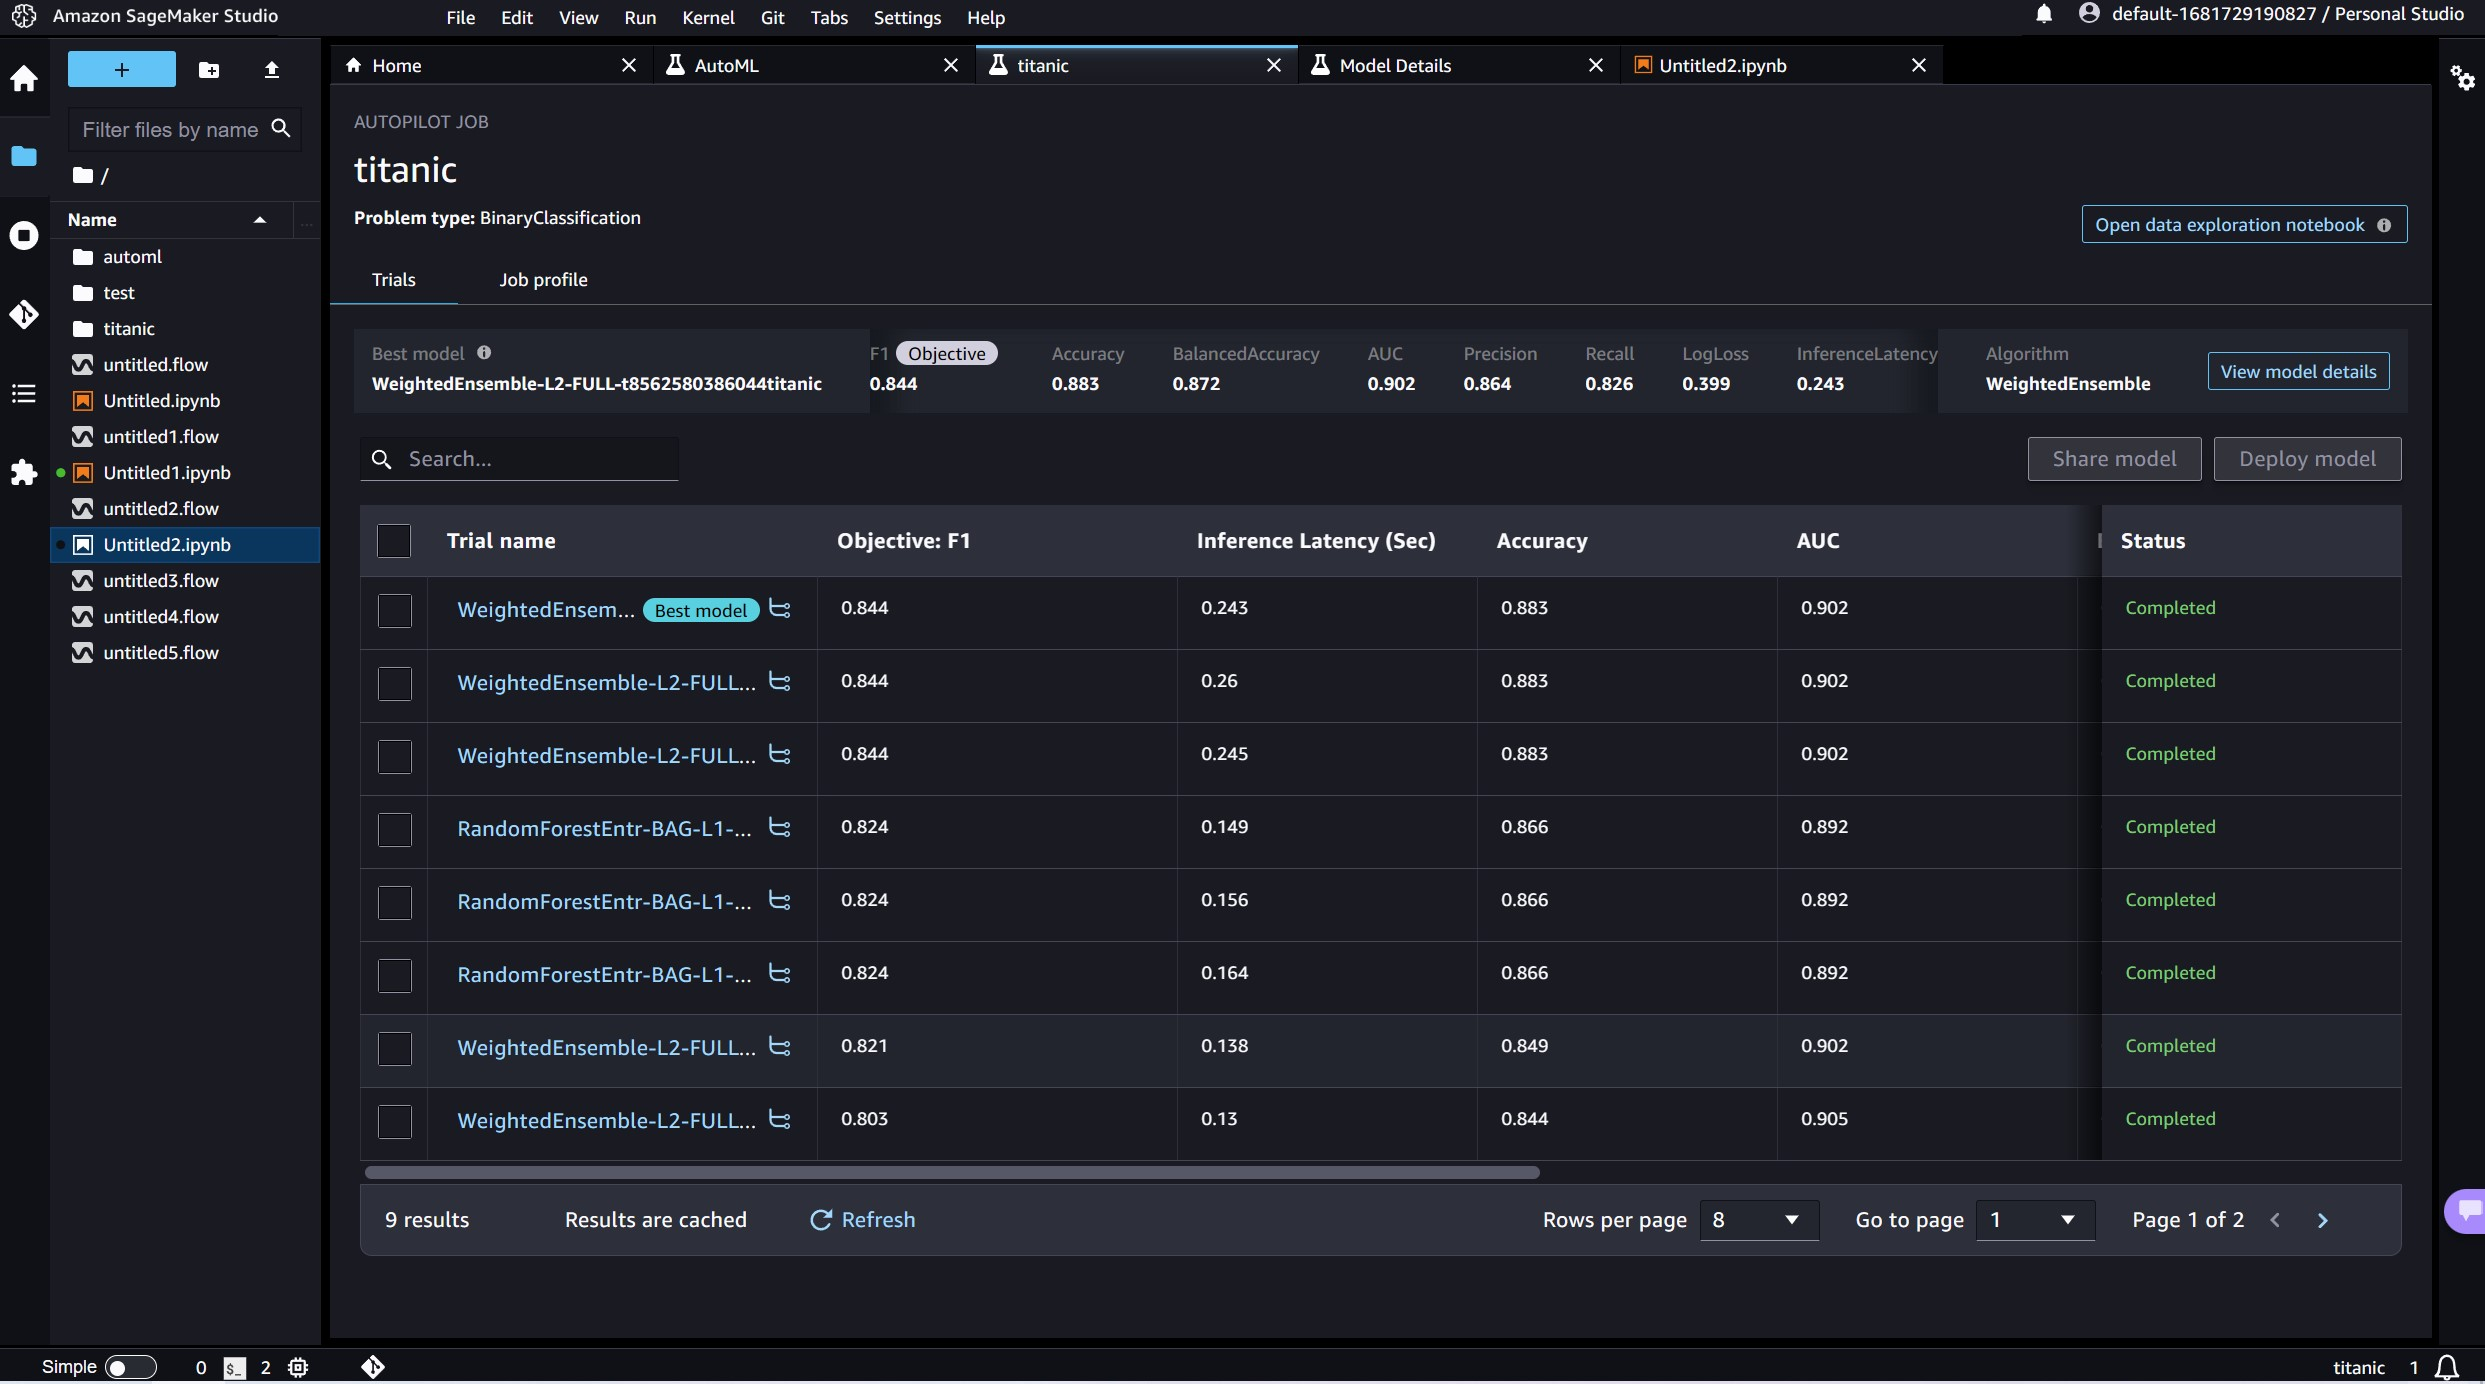

## auto machine learning 运行结果

# SageMaker Analysis Report

We report the following SageMaker analysis.

## Explanations for all labels

The Model has `11` input features and `2` output labels. We computed KernelShap on the dataset and display the `10` features with the greatest feature attribution summed up over all the labels.
<br>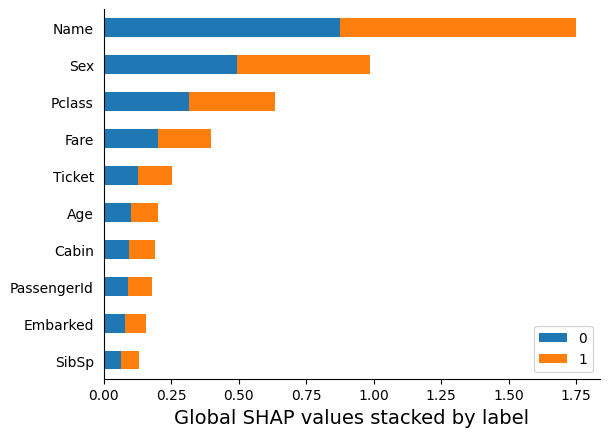<br>

## Explanations for "0"

The Model has `11` input features. We computed KernelShap on the dataset         `dataset` and display the `10` features with the greatest feature attribution.
<br>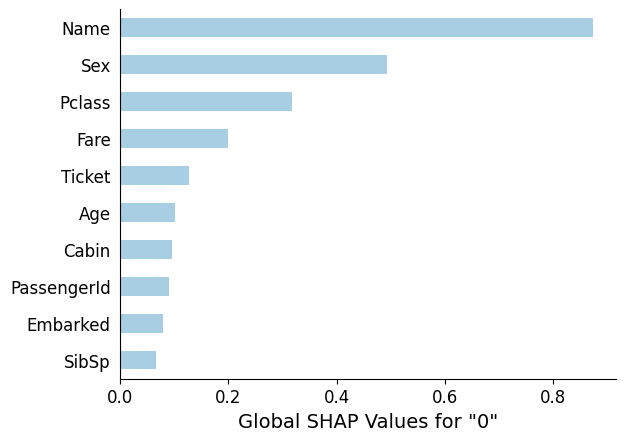<br>

## Explanations for "1"

The Model has `11` input features. We computed KernelShap on the dataset         `dataset` and display the `10` features with the greatest feature attribution.
<br>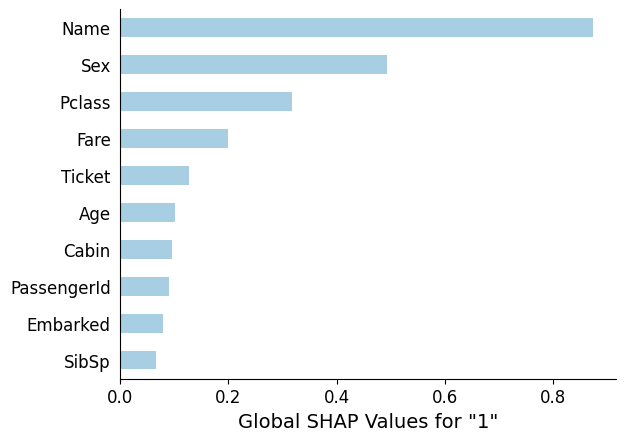<br>

1）泰坦尼克号乘客从性别上看，男性乘客最多，从存活率看，男性存活率却远远小于女性存活率， 这说明当时船上秉持着“女性优先”的宗旨。

2）乘客中三等舱的乘客数最多，其次是一等舱，最后是二等舱，但是三等舱存活率却是最低，这在一定程度反映出当时船上应该是上层阶级优先逃生。

3）船上独自一人的乘客最多，小家庭其次，大家庭乘客最少，但从存活率看，小家庭的存活率最高，其次是个人乘客，最后是大家庭，这可能与大家庭中已婚男士为主要组成元素有关，而大家庭人数的存活率最低可能是因为大家庭乘客为购买三等舱的主力。

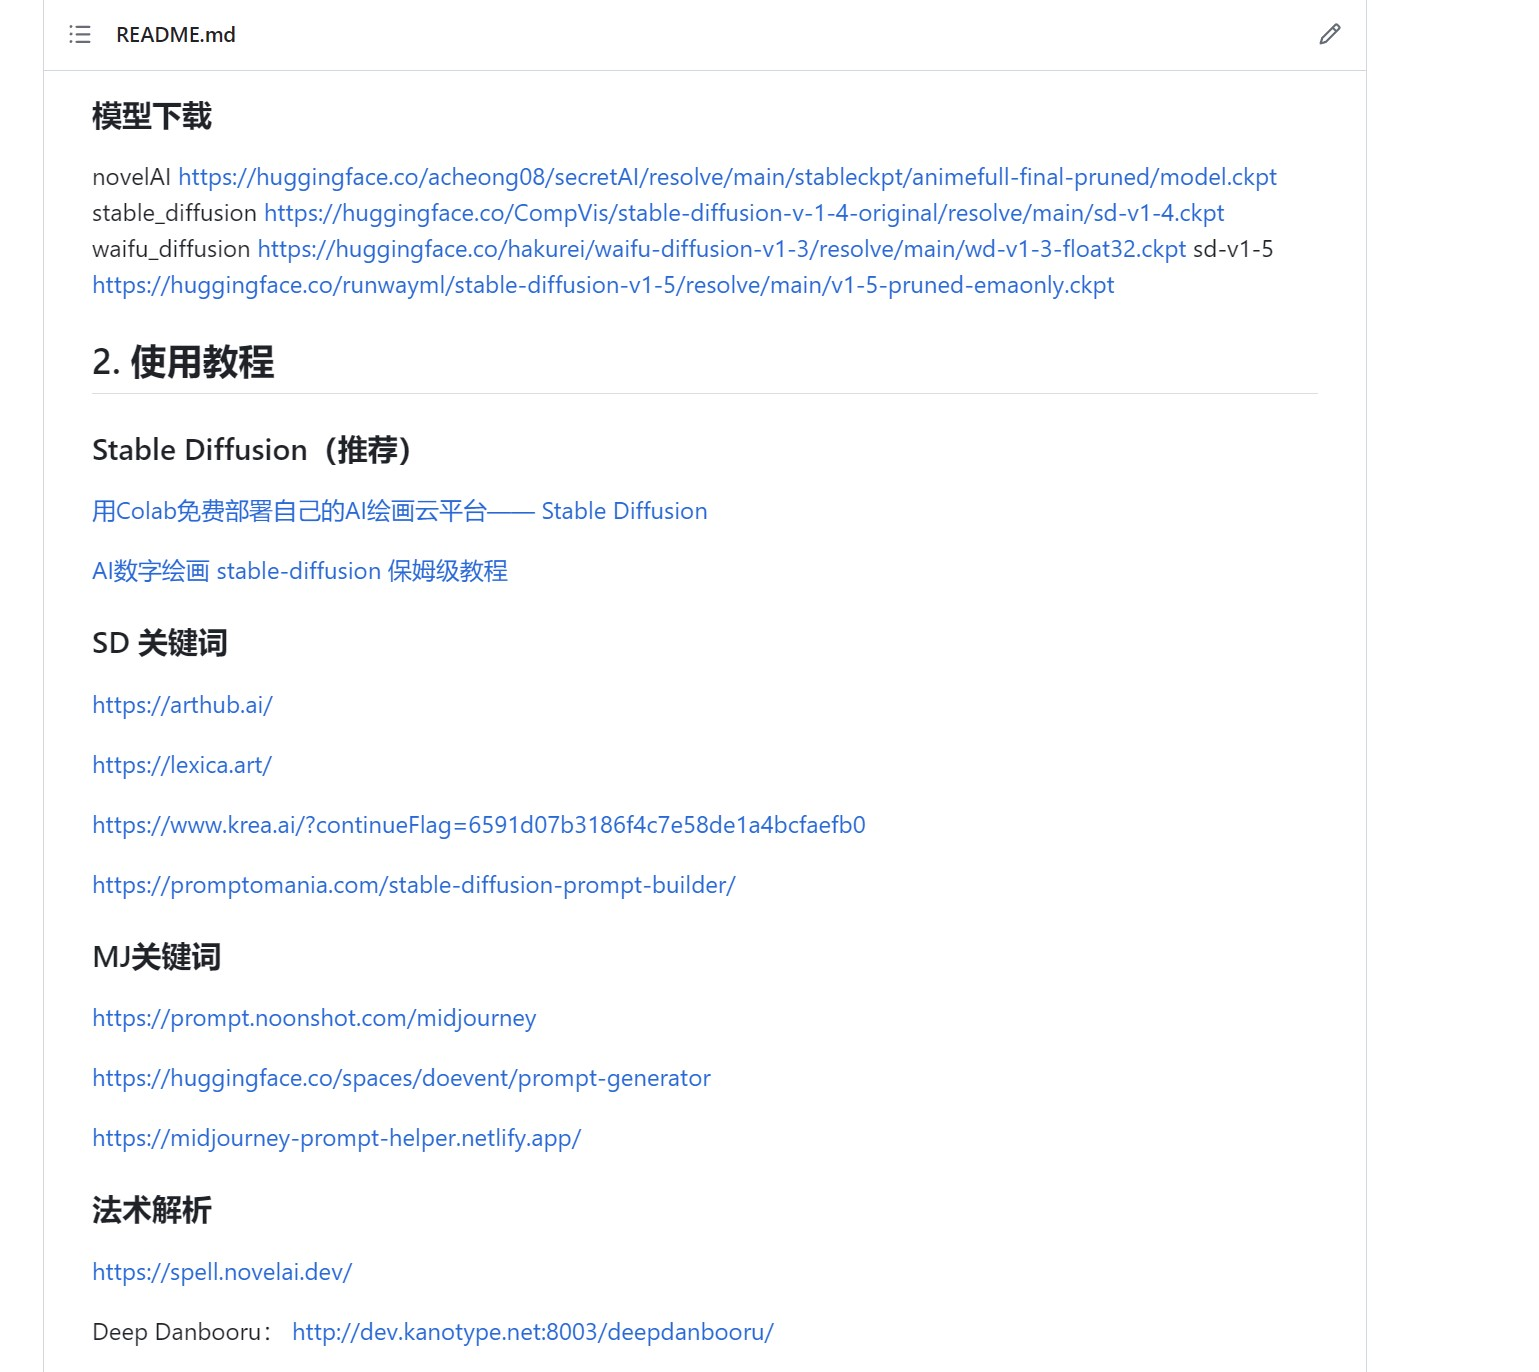

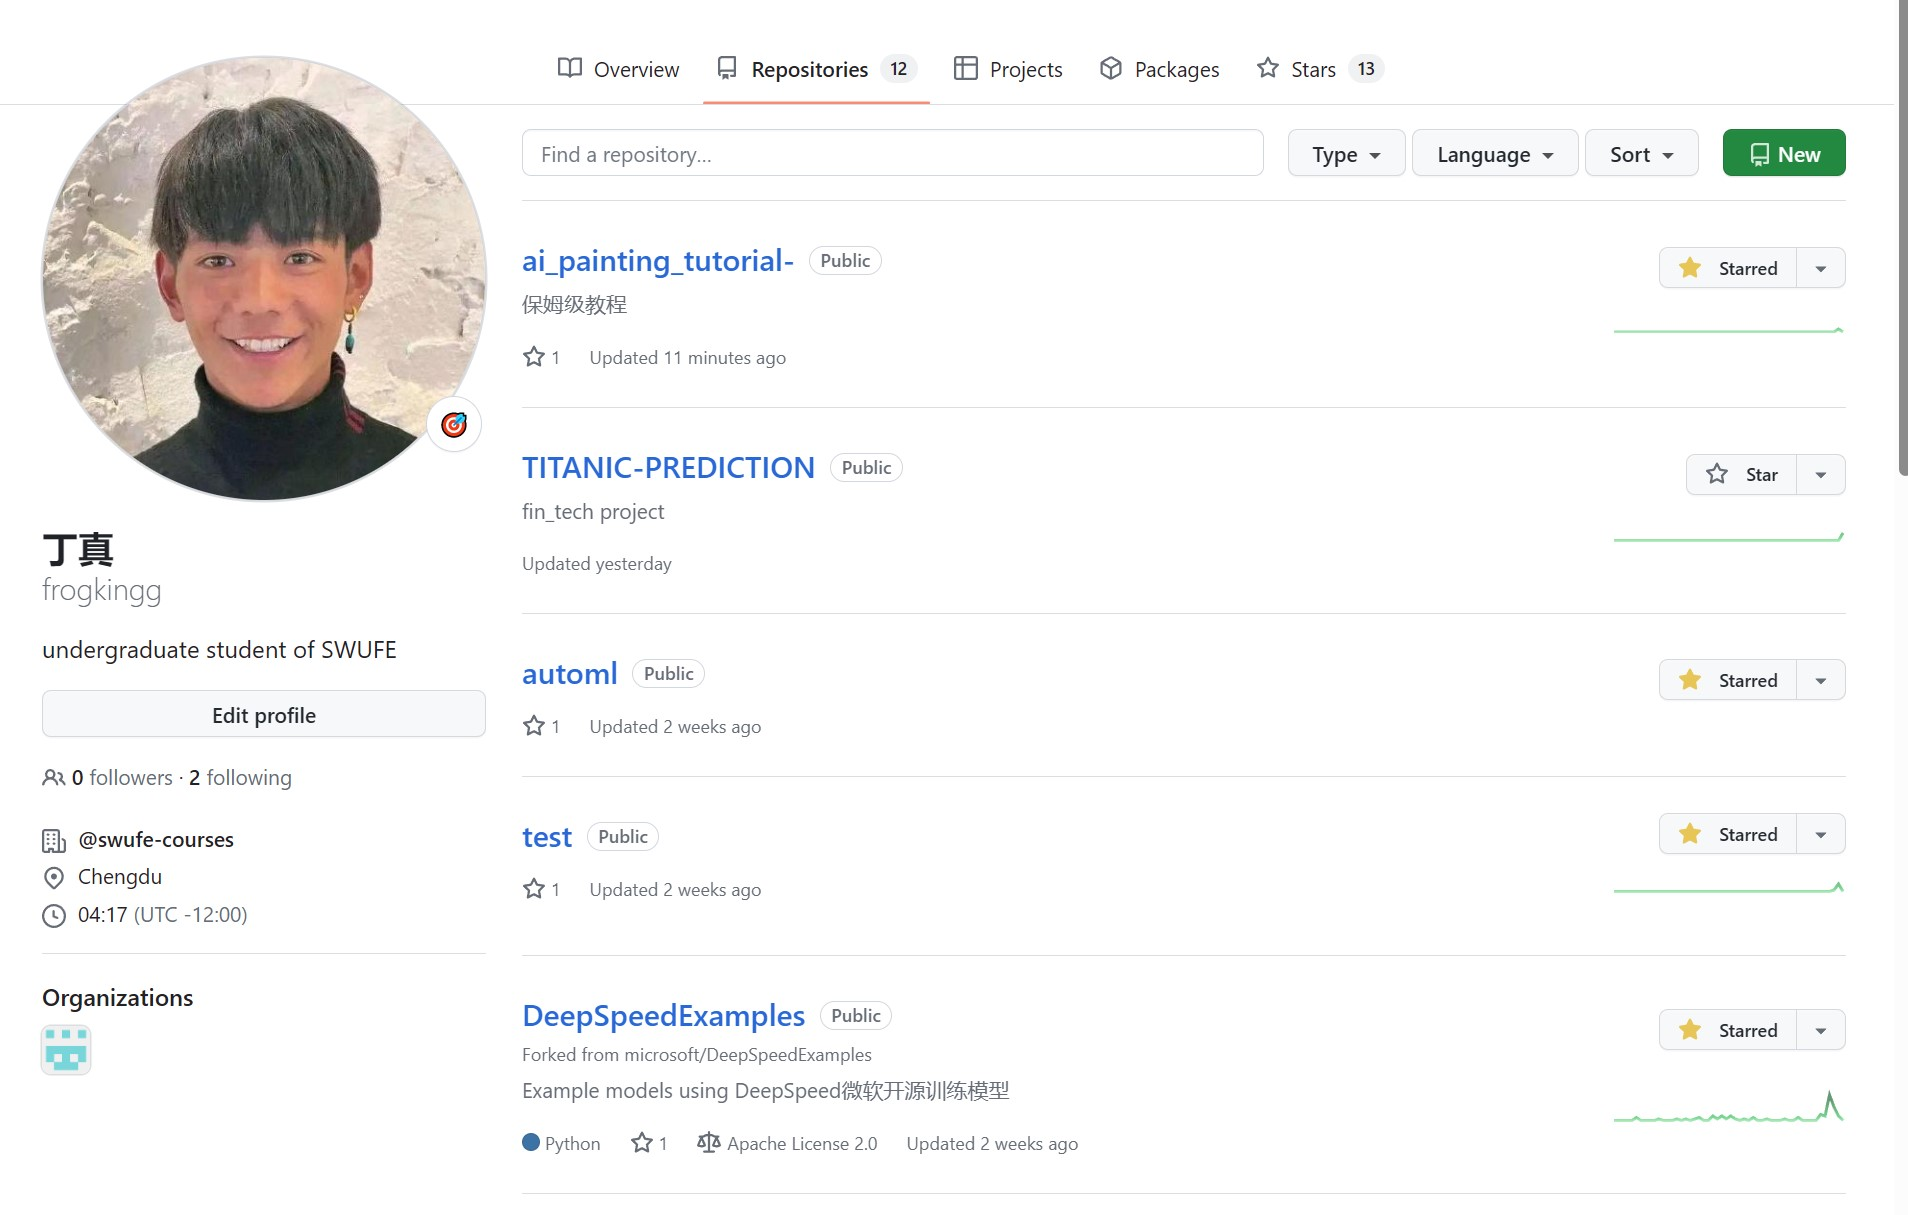

# https://github.com/frogkingg

# 总结
1. 使用sklearn和剪枝方法时遇到了一些的问题，通过查阅了相应资料解决了大部分问题，对决策的实现逻辑有了较为深入的认识。    

2. 自建模型和sklearn中的模型还是存在一定的差距，应进行进一步的优化和剪枝处理。  

3. 自动机器学习  
